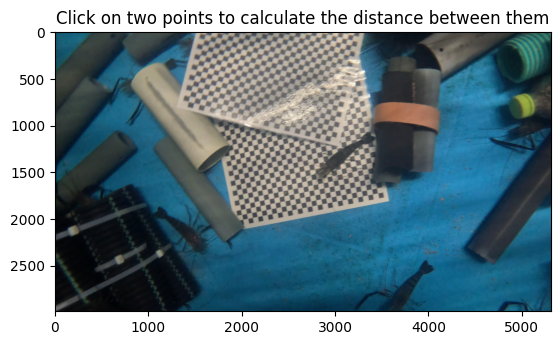

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load the image using OpenCV
# Please ensure the path is correct for your system or pass it as a parameter
image_path = './GX010090_5_448.jpg'
image = cv2.imread(image_path)
image_to_show = image.copy()

# Function to display the image, collect manual input, and calculate the distance between two points
def manual_marking_and_distance(image):
    fig, ax = plt.subplots()
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Click on two points to calculate the distance between them')

    points = []  # List to store points

    def onclick(event):
        # On click, add point to list and draw it
        points.append((event.xdata, event.ydata))
        ax.plot(event.xdata, event.ydata, 'ro')  # Mark the point
        plt.draw()
        
        # If two points are marked, calculate and display the distance
        if len(points) == 2:
            dist_pixels = np.linalg.norm(np.array(points[0]) - np.array(points[1]))
            print(f"Distance: {dist_pixels:.2f}px")
            ax.annotate(f"{dist_pixels:.2f}px",
                        xy=(np.mean([points[0][0], points[1][0]]), 
                            np.mean([points[0][1], points[1][1]])),
                        xytext=(15, 15),
                        textcoords='offset points',
                        arrowprops=dict(facecolor='yellow', shrink=0.05),
                        horizontalalignment='right', verticalalignment='top')

    # Connect the click event to the onclick function
    cid = fig.canvas.mpl_connect('button_press_event', onclick)

    # Show the image and wait for the user to click
    plt.show()

    # Disconnect the event after two clicks
    fig.canvas.mpl_disconnect(cid)

    return np.array(points)

# Main workflow
points = manual_marking_and_distance(image_to_show)
